In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.tsa.stattools import adfuller

In [2]:
start = datetime(2002, 1, 1)
end = datetime(2021, 9, 29)

In [3]:
dell = web.DataReader('DELL', 'yahoo', start=start, end=end)
dell

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-08-17,12.348319,12.067676,12.207997,12.067676,271519.0,12.067676
2016-08-18,12.348319,11.927354,12.348319,11.997515,1767366.0,11.997515
2016-08-19,12.207997,11.969450,11.983482,12.207997,4735900.0,12.207997
2016-08-22,12.797349,11.955418,12.067676,12.250094,2245909.0,12.250094
2016-08-23,12.881542,12.207997,12.278158,12.628963,1483020.0,12.628963
...,...,...,...,...,...,...
2021-09-23,53.335022,50.177395,51.079575,52.047642,11649184.0,52.047642
2021-09-24,52.762291,52.002026,52.017235,52.650787,6315968.0,52.650787
2021-09-27,53.264065,52.397366,52.422707,53.152561,4292853.0,53.152561


In [4]:
returns = 100 * dell.Close.pct_change().dropna()
returns

Date
2016-08-18   -0.581395
2016-08-19    1.754385
2016-08-22    0.344832
2016-08-23    3.092785
2016-08-24    1.333328
                ...   
2021-09-23    3.445145
2021-09-24    1.158834
2021-09-27    0.953022
2021-09-28    0.400492
2021-09-29    0.085479
Name: Close, Length: 1288, dtype: float64

In [5]:
returns.var()

4.869628963751995

Text(0.5, 1.0, 'DELL Returns')

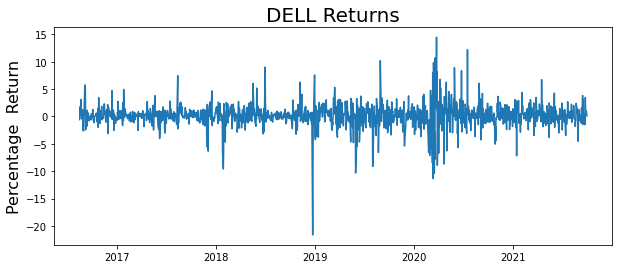

In [6]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Percentage  Return', fontsize=16)
plt.title('DELL Returns', fontsize=20)

In [7]:
result = adfuller(returns)
print('DELL Returns ADF Test')
print("ADF Statistic: %f" %result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

DELL Returns ADF Test
ADF Statistic: -9.186139
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


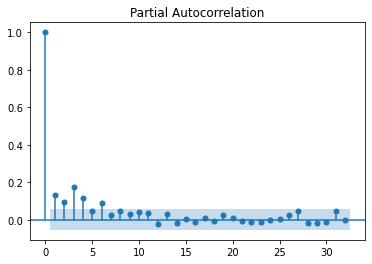

In [8]:
plot_pacf(returns**2)
plt.show()

# Splitting Data

In [9]:
train, test= returns[0:int(len(returns)*0.80)], returns[int(len(returns)*0.80):]

In [10]:
print(len(train))
print(len(test))

1030
258


In [11]:
rolling_predictions = []
for i in range(len(test)):
    train = returns[:-(len(test)-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.residual_variance.values[-1,:][0]))

C:\Users\wafa\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\wafa\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\wafa\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message.

In [13]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[1030:])
rolling_predictions 

Date
2020-09-22    1.885492
2020-09-23    1.840706
2020-09-24    1.836725
2020-09-25    1.776631
2020-09-28    1.717069
                ...   
2021-09-23    1.831583
2021-09-24    2.110687
2021-09-27    2.007638
2021-09-28    1.915198
2021-09-29    1.824801
Length: 258, dtype: float64

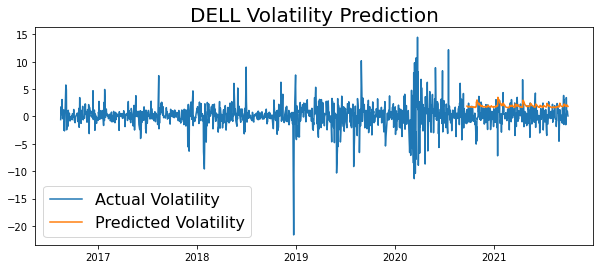

In [21]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns)
preds, = plt.plot(rolling_predictions)
plt.title('DELL Volatility Prediction', fontsize=20)
plt.legend(['Actual Volatility', 'Predicted Volatility'], fontsize=16)

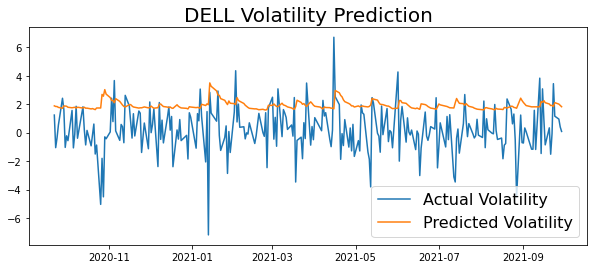

In [22]:
plt.figure(figsize=(10,4))
true, = plt.plot(test)
preds, = plt.plot(rolling_predictions)
plt.title('DELL Volatility Prediction', fontsize=20)
plt.legend(['Actual Volatility', 'Predicted Volatility'], fontsize=16)

In [20]:
mse = mean_squared_error(test, rolling_predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, rolling_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, rolling_predictions))
print('RMSE: '+str(rmse))

MSE: 5.656952237329527
MAE: 1.9518482449821146
RMSE: 2.378434829321486
